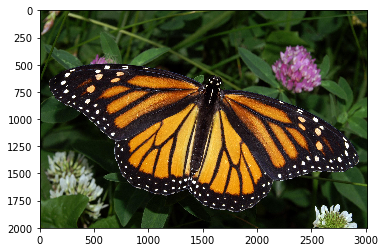

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/Monarch_In_May.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)



In [3]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image_copy.reshape((-1, 3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

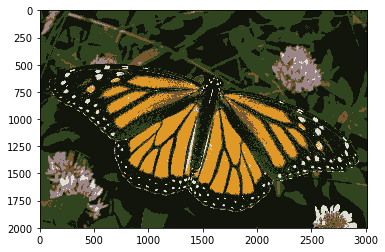

In [8]:
# Define stopping criteria
# cluster move less than it will stop cv2.TERM_CRITERIA_EPS 
# 10 max number of iteration
# # Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
# Perform k-means clustering
k = 6
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image_copy.shape))
labels_reshape = labels.reshape(image_copy.shape[0], image_copy.shape[1])

plt.imshow(segmented_image)

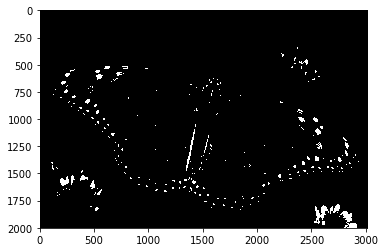

In [9]:
# Visualise the segment

plt.imshow(labels_reshape == 1, cmap='gray')

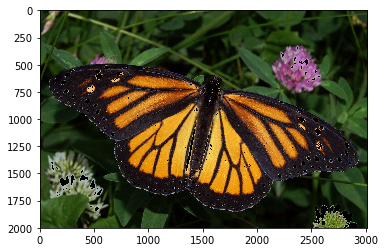

In [10]:
# Mask image segment
masked_image = np.copy(image_copy)

masked_image[labels_reshape == 1] = [0, 0, 0]

plt.imshow(masked_image)